# Lab2 exercises 2

### IMDB Data preparation
IMDB = Internet Movie Database. is a popular online platform that gathers many information related to multimed like movies, tv shows, video games and many more.

tf-idf = term frequency–inverse document frequency

#### Preliminary steps

In [1]:
!test -e aclimdb_reviews_train.txt || wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.txt -O aclimdb_reviews_train.txt

#### Exercise 2.1
Load the IMDb dataset as a list of lists.

In [2]:
import csv
from collections import Counter

dataset = [ [], [] ]
NUMBER_OF_COLS = 2
NUMBER_OF_ROWS = 0
MEASUREMENTS = []
with open("aclimdb_reviews_train.txt") as f:
    for row in csv.reader(f):
        NUMBER_OF_ROWS = NUMBER_OF_ROWS + 1
        if NUMBER_OF_ROWS == 1:
            MEASUREMENTS = row
            continue
        if len(row) == NUMBER_OF_COLS:  # only do this if the number of columns is as expected
            dataset[0].append(row[0])
            dataset[1].append(int(row[1]))
NUMBER_OF_ROWS = NUMBER_OF_ROWS - 1

print(f"Measurements {MEASUREMENTS}")
print(f"Loaded {NUMBER_OF_ROWS} rows")
print(f"Number of 1's and 0's:", [(k, v) for k, v in Counter(dataset[1]).items()])

Measurements ['review', 'label']
Loaded 25000 rows
Number of 1's and 0's: [(1, 12500), (0, 12500)]


In [3]:
idx = 2
print(dataset[1][idx], dataset[0][idx])

1 Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of "Rosemary's Baby" and "The Exorcist"--but what a combination! Based on the best-seller by Jeffrey Konvitz, "The Sentinel" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat 

#### Exercise 2.2
Apply the tokenization function listed below to your reviews.Please refer to the function’s docstring for the input and output parameters. The tokenization procedure splits each comment in tokens (i.e. separate words).

In [4]:
import string

def tokenize(docs):
    """Compute the tokens for each document.
    Input: a list of strings. Each item is a document to tokenize.
    Output: a list of lists. Each item is a list containing the tokens of the relative document.
    """
    tokens = []
    for doc in docs:
        for punct in string.punctuation:  # string.punctuation is [ '!', '"', '#', ... ]
            doc = doc.replace(punct, " ")
        split_doc = [ token.lower() for token in doc.split(" ") if token ]
        tokens.append(split_doc)
    return tokens

In [5]:
token_list = tokenize(dataset[0])  # tokenize reviews

In [6]:
print(token_list[0])

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']


#### Exercise 2.3
The next step requires the computation of the term frequency (TF) of each token within its respective document. Although there exist different techniques to evaluate the frequency, we will now assume that the TF of a token t in a document d is equal to the number of occurrences of t in d. Compute the TF for all your reviews.

In [7]:
def compute_TF(token_list):
    TF = []

    for document in token_list:
        tf = {}
        for token in document:
            tf[token] = tf.get(token, 0) + 1
        TF.append(tf)
    return TF

In [8]:
TF_list = compute_TF(token_list)

In [9]:
print(TF_list[0])

{'for': 3, 'a': 5, 'movie': 2, 'that': 1, 'gets': 1, 'no': 1, 'respect': 1, 'there': 1, 'sure': 1, 'are': 1, 'lot': 1, 'of': 1, 'memorable': 1, 'quotes': 1, 'listed': 1, 'this': 1, 'gem': 1, 'imagine': 1, 'where': 1, 'joe': 1, 'piscopo': 1, 'is': 3, 'actually': 1, 'funny': 1, 'maureen': 1, 'stapleton': 1, 'scene': 1, 'stealer': 1, 'the': 2, 'moroni': 1, 'character': 1, 'an': 1, 'absolute': 1, 'scream': 1, 'watch': 1, 'alan': 1, 'skipper': 1, 'hale': 1, 'jr': 1, 'as': 1, 'police': 1, 'sgt': 1}


#### Exercise 2.4
We will now compute the inverse document frequency (IDF). While the TF gives an idea of the weight of a token within a document, the IDF is used to find its significance among the entire collection of documents (i.e. your reviews). One possible way of computing it is:

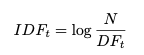

where N is the number of documents and DFt is the document frequency of a token, i.e. the number of documents in which t appears at least once. As you can see, IDFt ∈ [0,logN]. Furthermore, a low value means that the token appears in the majority of the documents, hence its presence is not relevant to characterize any subset of them, whereas an high value indicates relevance for a few documents.

(a) Compute the DF for all of your tokens;

(b) Compute the IDF for all of your tokens;

(c) Try to sort the IDF values in ascending order. Which tokens (i.e. words) came to the top? Can you figure out why?

In [10]:
import math

def compute_IDF(TF_list):
    DF = {}
    N = len(TF_list)  # numbers of reviews

    # compute the document-frequency (DF), i.e. the number of documents in which each token appears at least once 
    for review_tf in TF_list:
        for token, token_tf in review_tf.items():
            DF[token] = DF.get(token, 0) + 1
    # compute the actual IDF
    return {token: math.log(N / df) for token, df in DF.items()}

In [11]:
IDF_dict = compute_IDF(TF_list)

In [12]:
sorted_view = sorted(IDF_dict.items(), key=lambda item: item[1])

In [13]:
# Most frequent words
sorted_view[:10]

[('the', 0.008314469604085238),
 ('a', 0.03351541933781697),
 ('and', 0.03401190259170586),
 ('of', 0.05226218466281087),
 ('to', 0.06293979977387414),
 ('this', 0.09924591465797242),
 ('is', 0.1086102347240488),
 ('it', 0.11536595914077863),
 ('in', 0.12606221366364628),
 ('that', 0.20722099077039452)]

In [14]:
# Less frequent words
sorted_view[-10:]

[('ant1', 10.126631103850338),
 ('infantalising', 10.126631103850338),
 ('roué', 10.126631103850338),
 ('orientalist', 10.126631103850338),
 ('imy', 10.126631103850338),
 ('jayden', 10.126631103850338),
 ('repleat', 10.126631103850338),
 ('jowls', 10.126631103850338),
 ('camora', 10.126631103850338),
 ('capiche', 10.126631103850338)]

The words with the lowest IDF values show up in the majority of documents. Looking at them, you can notice that they are mainly articles, conjunctions, pronouns or even single letters. These words, which are commonly known as stopwords, are typically removed in the majority of text processing tasks.

#### Exercise 2.5
Compute the TF-IDF. Combine the definitions of term frequency (TF) and inverse document frequency (IDF), to produce a composite weight for each term in each document. The TF-IDF weighting scheme assigns to a term t a weight in the document d given by:

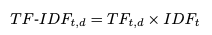

In other words assigns to term t a weight in document d that is:

• high when t occurs many times within a small number of documents;

• low when the term occurs fewer times in a document, or occurs in many documents (thus offering a less pronounced relevance signal);

• lowest when the term occurs in virtually all documents.

For dictionary terms that do not occur in a document, the weight is zero.
The suggested output structure is a list of dictionaries. Each dictionary represents a document and contains its tokens as key and weights.

In [15]:
def compute_TFIDF(TF_list, IDF_dict):
    TFIDF = []
    
    for d in TF_list:
        tfidf = {}
        for t, t_tf in d.items():
            tfidf[t] = t_tf * IDF_dict[t]
        TFIDF.append(tfidf)
    return TFIDF

In [16]:
tf_idf = compute_TFIDF(TF_list, IDF_dict)

In [17]:
tf_idf[0]

{'for': 1.005075851886905,
 'a': 0.16757709668908488,
 'movie': 0.9813925049416498,
 'that': 0.20722099077039452,
 'gets': 2.257229391273248,
 'no': 1.1141321003261466,
 'respect': 3.9845936982629815,
 'there': 0.837387134278689,
 'sure': 2.3530366364901436,
 'are': 0.5868431101899066,
 'lot': 2.0319474551515233,
 'of': 0.05226218466281087,
 'memorable': 3.6936910111111585,
 'quotes': 5.5940316106970815,
 'listed': 5.339139361068292,
 'this': 0.09924591465797242,
 'gem': 4.291820366787733,
 'imagine': 3.587045148232668,
 'where': 1.655900786844441,
 'joe': 4.137669686960474,
 'piscopo': 7.418580902748128,
 'is': 0.3258307041721464,
 'actually': 1.982532640511814,
 'funny': 2.0743346043116913,
 'maureen': 6.437751649736401,
 'stapleton': 7.561681746388801,
 'scene': 1.8767946184246356,
 'stealer': 7.487573774235079,
 'the': 0.016628939208170476,
 'moroni': 8.740336742730447,
 'character': 1.641547966352334,
 'an': 0.7166205367455873,
 'absolute': 4.315490110873637,
 'scream': 4.70609610

#### Exercise 2.6
(*) Sentiment analysis. Given a document, identify if it belongs to positive or negative comments calculating the similarity between the comments in the two groups.

Official solution: https://dbdmg.polito.it/dbdmg_web/wp-content/uploads/2021/10/solution-1.html

How do we quantify the similarity between two documents exploiting TF-IDF vector representation?


A first attempt might consider the magnitude of the vector difference between two document vectors. This measure suffers from a drawback: two documents with very similar content can have a significant vector difference simply because one is much longer than the other. 
Thus the relative distributions of terms may be identical in the two documents, but the absolute term frequencies of one may be far larger. To compensate for the effect of document length, the standard way of quantifying the similarity between two documents d1 and d2 is to compute the cosine similarity of their vector representations V⃗ (d1) and V⃗ (d2):

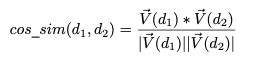


To solve this simple task of sentiment analysis you have to:

(a) Take the vector representation of the first document in the collection. We will call it the test document.

(b) Identify the positive and negative comments and separate them into two groups.

(c) Compute the cosine similarity between the test document and all the other positive and negative comments separately.
Given that the vector representation for a document V⃗ (dn) is the dictionary of tokens with their weights, use the following functions to compute the cosine similarity:


In [18]:
def norm(d):
    """Compute the L2-norm of a vector representation."""
    return sum([ tf_idf**2 for t, tf_idf in d.items() ])**.5

def dot_product(d1, d2):
    """Compute the dot product between two vector representations."""
    word_set = set(list(d1.keys()) + list(d2.keys()))
    return sum([( d1.get(d, 0.0) * d2.get(d, 0.0)) for d in word_set ])

def cosine_similarity(d1, d2):
    """
    Compute the cosine similarity between documents d1 and d2.
    Input: two dictionaries representing the TF-IDF vectors for documents
    d1 and d2.
    Output: the cosine similarity.
    """
    return dot_product(d1, d2) / (norm(d1) * norm(d2))

(d) Assign the label (positive or negative) to the selected document analysing the mean similarity with respect to the group of positive comments and the mean similarity with respect to the group of negative comments.

(e) Are you able to identify the correct group? Why?

(f) Repeat the previous steps with other documents. Do you think the TF-IDF pre-processing is enough to perform a simple task of sentiment analysis?

In [19]:
print('Document (0) and document (1) have cosine similarity:', cosine_similarity(tf_idf[0], tf_idf[1]))

Document (0) and document (1) have cosine similarity: 0.0013020727956807678


In [20]:
pos_i = [i for i, label in enumerate(dataset[1]) if label == 1]
neg_i = [i for i, label in enumerate(dataset[1]) if label == 0]
len(pos_i), len(neg_i), pos_i[:5]

(12500, 12500, [0, 2, 4, 6, 8])

In [21]:
import numpy as np

similarities = []
y_true = dataset[1]
y_pred = []
r_len = len(tf_idf)
try:
    for i, r1 in enumerate(tf_idf):
        store_sim = []
        curr_sim = []
        for j, r2 in enumerate(tf_idf):
            if j == i:
                curr_sim.append(-1) # this value will never be used
            elif j < i:
                curr_sim.append(similarities[j][i-j-1]) # reuse the similarities already evaluated
            else:
                s = cosine_similarity(tf_idf[j], tf_idf[i])
                store_sim.append(s)
                curr_sim.append(s)
        similarities.append(store_sim) # store only the similarities computed in this iteration
        
        if i in pos_i:
            p_mask = pos_i.copy()
            p_mask.pop(i)
            n_mask = neg_i
        else:
            p_mask = pos_i
            n_mask = neg_i.copy()
            n_mask.pop(i)
            
        p_mean = np.array(curr_sim)[p_mask].mean()
        n_mean = np.array(curr_sim)[n_mask].mean()   
        
        if p_mean > n_mean:
            y_pred.append('1')
        else:
            y_pred.append('0')

        progress = 100*i/(r_len)
        
        print(f'{progress:.2f}%', end='\r')

        if progress > 1.0:
            raise Exception("Better to stop :)")
except Exception:
    print('\nInterrupted')
    pred_c = len(y_pred)
    correct = sum([1 for t, p in zip(y_pred, y_true[:pred_c]) if t == p])
    print(f'Computed {i} reviews up to now. Accuracy: {correct/pred_c * 100:.2f}%')

1.00%
Interrupted
Computed 251 reviews up to now. Accuracy: 0.00%
